# Импорт библиотек и загрузка датасета

In [498]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
color = sns.color_palette()
from scipy import stats

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

In [499]:
import os
os.chdir(r"C:\Users\vladick\Desktop\1")

In [863]:
train = pd.read_csv("train.csv")
test = pd.read_csv("public_test.csv")
train.shape, test.shape

((26157, 28), (5605, 27))

In [864]:
train.head()

,id,Тип_жилья,Широта,Долгота,Город,Индекс,Площадь,Этаж,Размер_участка,Расход_тепла,...,Нлч_парковки,Нлч_почтового_ящика,Нлч_балкона,Нлч_террасы,Нлч_подвала,Нлч_гаража,Нлч_кондиционера,Последний_этаж,Верхний_этаж,Цена
0,35831305,квартира,48.875375,2.483820,rosny-sous-bois,4575,64.0,2.0,NaN,150.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,295000.0
1,35854039,квартира,45.522327,4.869322,vienne,1793,75.0,NaN,NaN,220.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,194000.0
2,36058437,квартира,43.672828,1.281469,mondonville,1425,42.0,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,179000.0
3,35989147,дом,44.158752,1.532081,caussade,4077,102.0,NaN,2000.0,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,205000.0
4,36029269,квартира,47.655212,-2.754196,vannes,2498,84.0,3.0,NaN,NaN,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,508000.0


In [865]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        26157 non-null  int64  
 1   Тип_жилья                 26157 non-null  object 
 2   Широта                    26157 non-null  float64
 3   Долгота                   26157 non-null  float64
 4   Город                     26157 non-null  object 
 5   Индекс                    26157 non-null  int64  
 6   Площадь                   25806 non-null  float64
 7   Этаж                      6801 non-null   float64
 8   Размер_участка            10928 non-null  float64
 9   Расход_тепла              13313 non-null  float64
 10  Ктгр_энергоэффективности  13313 non-null  object 
 11  Кво_вредных_выбросов      12942 non-null  float64
 12  Ктгр_вредных_выбросов     12942 non-null  object 
 13  Направление               6344 non-null   object 
 14  Кво_ко

# EDA

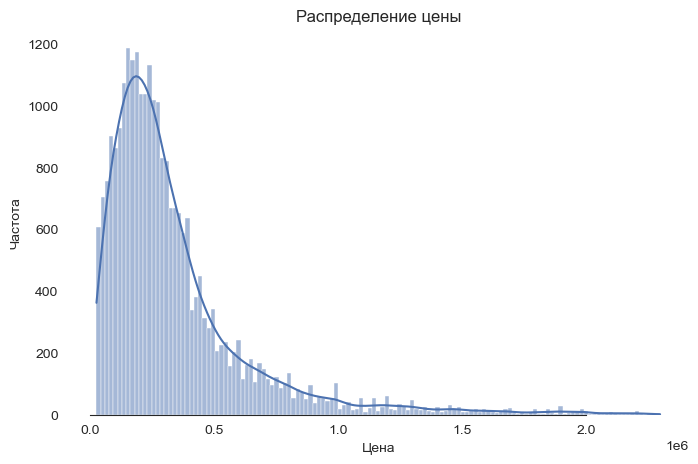

In [866]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 5))

sns.histplot(train['Цена'], color="b", kde=True);
ax.xaxis.grid(False)
ax.set(ylabel="Частота")
ax.set(xlabel="Цена")
ax.set(title="Распределение цены")
sns.despine(trim=True, left=True)
plt.show()

In [867]:
print("Skewness: %f" % train['Цена'].skew())
print("Kurtosis: %f" % train['Цена'].kurt())

Skewness: 2.516395
Kurtosis: 8.325256


In [868]:
train.columns

Index(['id', 'Тип_жилья', 'Широта', 'Долгота', 'Город', 'Индекс', 'Площадь',
       'Этаж', 'Размер_участка', 'Расход_тепла', 'Ктгр_энергоэффективности',
       'Кво_вредных_выбросов', 'Ктгр_вредных_выбросов', 'Направление',
       'Кво_комнат', 'Кво_спален', 'Кво_ванных', 'Кво_фото', 'Нлч_парковки',
       'Нлч_почтового_ящика', 'Нлч_балкона', 'Нлч_террасы', 'Нлч_подвала',
       'Нлч_гаража', 'Нлч_кондиционера', 'Последний_этаж', 'Верхний_этаж',
       'Цена'],
      dtype='object')

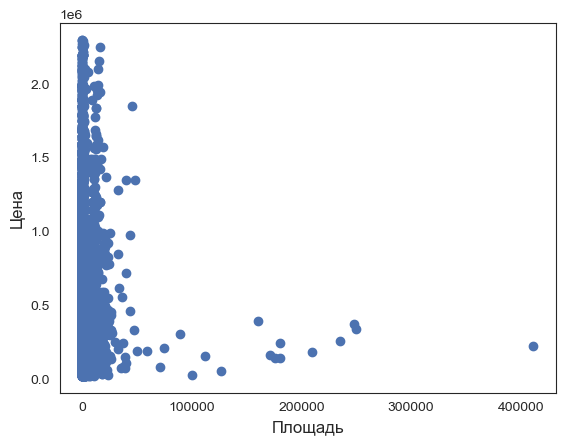

In [871]:
fig, ax = plt.subplots()
ax.scatter(x = train['Площадь'], y = train['Цена'])
plt.ylabel('Цена', fontsize=12)
plt.xlabel('Площадь', fontsize=12)
plt.show()

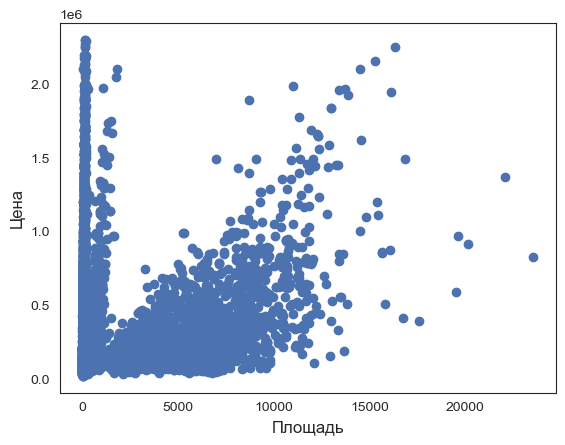

In [872]:
fig, ax = plt.subplots()
ax.scatter(x = train[train['Тип_жилья'] == 'квартира']['Площадь'], y = train[train['Тип_жилья'] == 'квартира']['Цена'])
plt.ylabel('Цена', fontsize=12)
plt.xlabel('Площадь', fontsize=12)
plt.show()

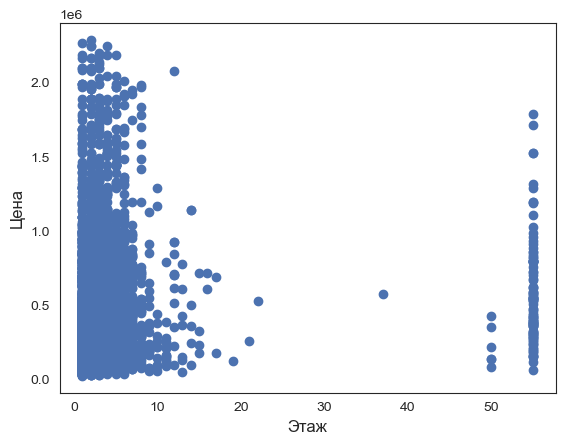

In [873]:
fig, ax = plt.subplots()
ax.scatter(x = train['Этаж'], y = train['Цена'])
plt.ylabel('Цена', fontsize=12)
plt.xlabel('Этаж', fontsize=12)
plt.show()

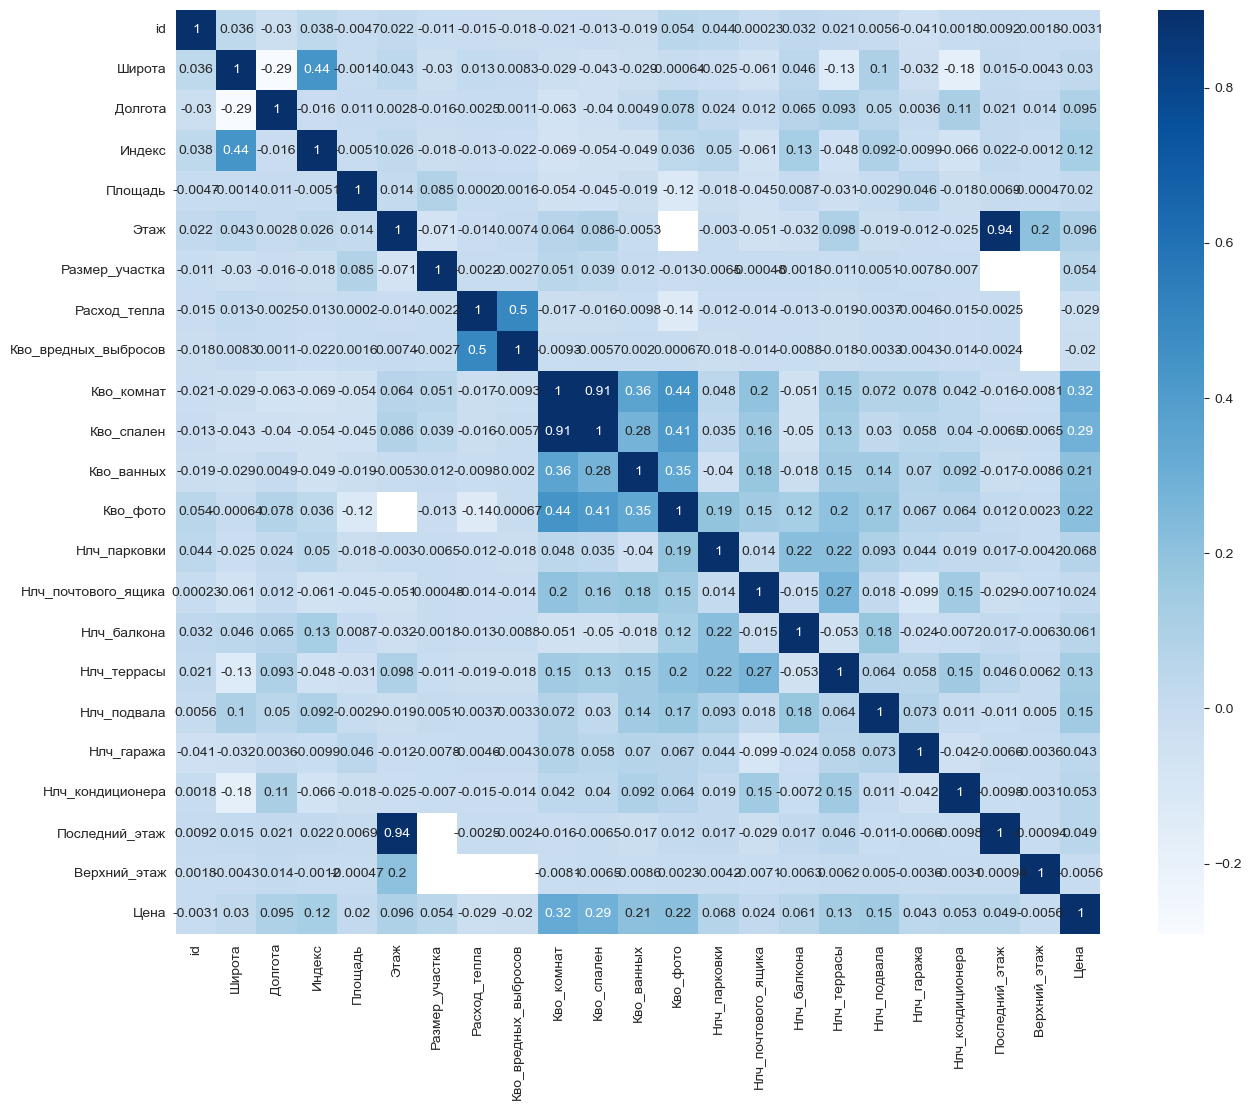

In [874]:
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns

corr = train[numeric_columns].corr()

plt.subplots(figsize=(15, 12))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True, annot=True)
plt.show()

In [875]:
train["Цена"] = np.log1p(train["Цена"])

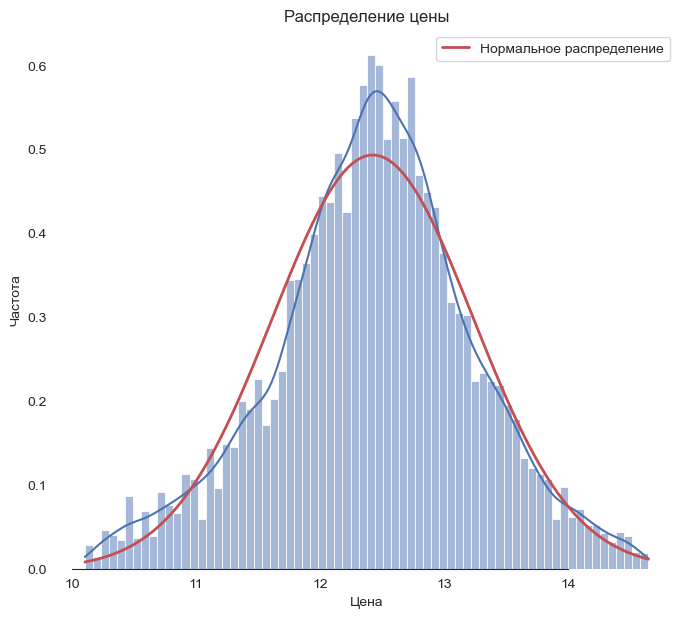

In [876]:
from scipy.stats import skew, norm

sns.set_style("white")
sns.set_color_codes(palette='deep')

fig, ax = plt.subplots(figsize=(8, 7))

sns.histplot(train['Цена'], kde=True, stat="density", ax=ax)

mean = train['Цена'].mean()
std = train['Цена'].std()

x = np.linspace(train['Цена'].min(), train['Цена'].max(), 100)

ax.plot(x, norm.pdf(x, mean, std), 'r-', lw=2, label='Нормальное распределение')

ax.xaxis.grid(False)
ax.set(ylabel="Частота")
ax.set(xlabel="Цена")
ax.set(title="Распределение цены")
ax.legend()
sns.despine(trim=True, left=True)

plt.show()

In [877]:
train_labels = train['Цена'].reset_index(drop=True)
train_features = train.drop(['Цена'], axis=1)
test_features = test

all_features = pd.concat([train_features, test_features]).reset_index(drop=True)
all_features.shape

(31762, 27)

In [878]:
def percent_missing(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})
    
    return dict_x

missing = percent_missing(all_features)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Процент пропущенных данных')
df_miss[0:10]

Процент пропущенных данных


[('Направление', 75.81),
 ('Этаж', 73.94),
 ('Размер_участка', 58.25),
 ('Кво_вредных_выбросов', 50.49),
 ('Ктгр_вредных_выбросов', 50.49),
 ('Расход_тепла', 49.04),
 ('Ктгр_энергоэффективности', 49.04),
 ('Кво_фото', 35.5),
 ('Кво_спален', 7.29),
 ('Кво_комнат', 4.23)]

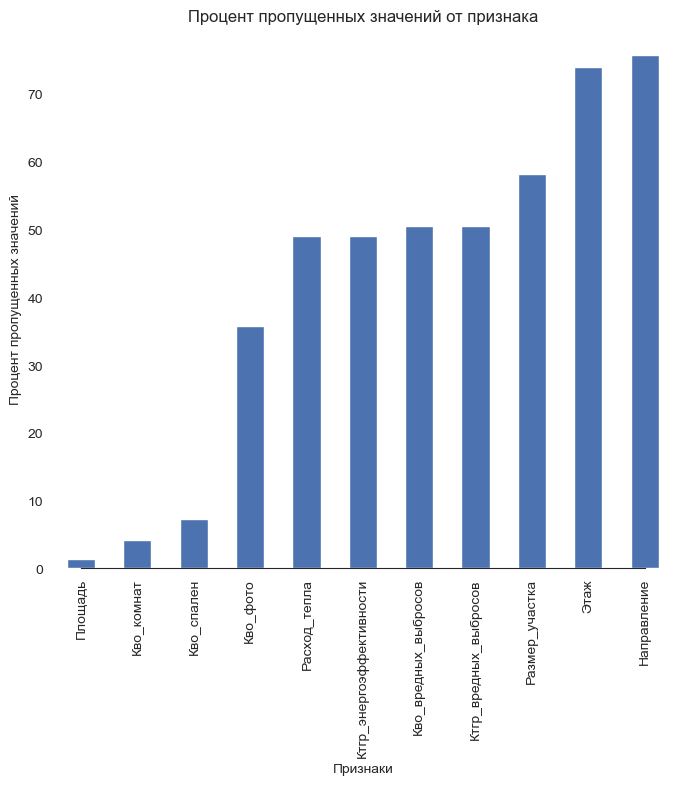

In [879]:
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
sns.set_color_codes(palette='deep')
missing = round(train.isnull().mean()*100,2)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color="b")

ax.xaxis.grid(False)
ax.set(ylabel="Процент пропущенных значений")
ax.set(xlabel="Признаки")
ax.set(title="Процент пропущенных значений от признака")
sns.despine(trim=True, left=True)

In [880]:
unique_values_count = train['Город'].nunique()
print(f'Количество различных значений в колонке Город: {unique_values_count}')

Количество различных значений в колонке Город: 7199


In [881]:
unique_values_count2 = train['Ктгр_энергоэффективности'].unique()
print(unique_values_count2)

['C' 'D' nan 'E' 'B' 'A' 'F' 'G']


In [882]:
unique_values_count3 = train['Ктгр_вредных_выбросов'].unique()
print(unique_values_count3)

['C' 'E' nan 'D' 'B' 'A' 'G' 'F']


In [883]:
unique_values_count4 = train['Тип_жилья'].unique()
print(unique_values_count4)

['квартира' 'дом' 'дуплекс' 'вилла' 'особняк' 'земля' 'разное'
 'земля под застройку' 'лофт' 'ферма' 'участок с землей'
 'пожизненная рента' 'паркинг' 'шале' 'мельница' 'усадьба' 'дом на воде'
 'комната' 'ночлежка' 'мастерская' 'отель-усадьба']


In [884]:
def handle_missing(features):
    objects = []
    for i in features.columns:
        if features[i].dtype == 'object':
            objects.append(i)
        
    numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numeric = []
    for i in features.columns:
        if features[i].dtype in numeric_dtypes:
            numeric.append(i)
    for number in numeric:
        features[number] = features.groupby('Тип_жилья')[number].transform(lambda x: x.fillna(x.median()) if not pd.isna(x.median()) else 0)
    for object in objects:
        features[object] = features.groupby('Тип_жилья')[object].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else 'Неизвестно')
    
    return features
all_features = handle_missing(all_features)

In [885]:
all_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31762 entries, 0 to 31761
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        31762 non-null  int64  
 1   Тип_жилья                 31762 non-null  object 
 2   Широта                    31762 non-null  float64
 3   Долгота                   31762 non-null  float64
 4   Город                     31762 non-null  object 
 5   Индекс                    31762 non-null  int64  
 6   Площадь                   31762 non-null  float64
 7   Этаж                      31762 non-null  float64
 8   Размер_участка            31762 non-null  float64
 9   Расход_тепла              31762 non-null  float64
 10  Ктгр_энергоэффективности  31762 non-null  object 
 11  Кво_вредных_выбросов      31762 non-null  float64
 12  Ктгр_вредных_выбросов     31762 non-null  object 
 13  Направление               31762 non-null  object 
 14  Кво_ко

In [887]:
def is_binary(series):
    return set(series.unique()).issubset({0, 1})

numeric = all_features.select_dtypes(include=['float64', 'int64']).columns
filtered_numeric = [col for col in numeric if not is_binary(all_features[col])]

skew_features = all_features[filtered_numeric].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("Числовые {} признаки со Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew': high_skew})

print(skewness.head(10))

Числовые 8 признаки со Skew > 0.5 :
                            Skew
Размер_участка        140.474572
Кво_вредных_выбросов   61.863006
Расход_тепла           52.642585
Площадь                38.584199
Этаж                   11.804990
Кво_спален             10.098274
Кво_комнат              5.200275
Кво_ванных              1.021015


In [888]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
for i in skew_index:
    all_features[i] = boxcox1p(all_features[i], boxcox_normmax(all_features[i] + 1))

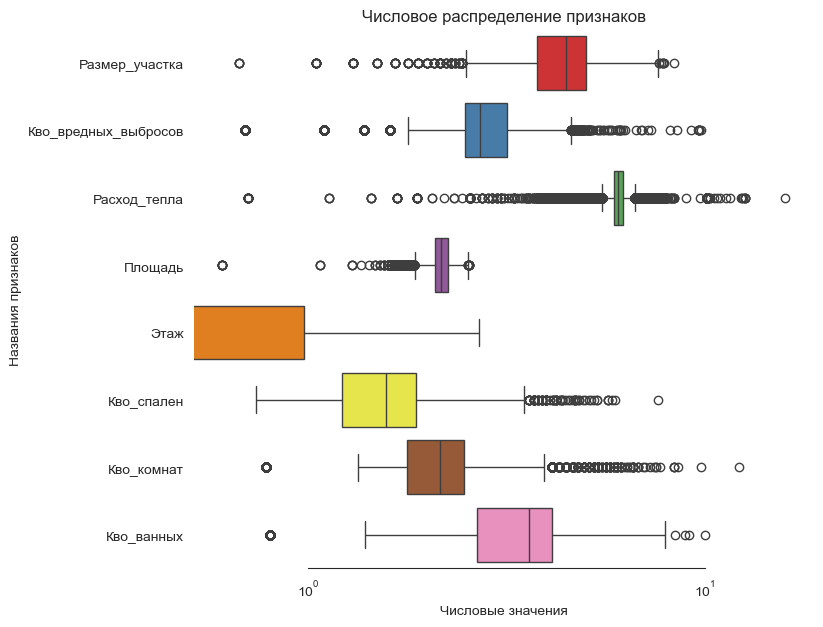

In [890]:
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=all_features[skew_index] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Названия признаков")
ax.set(xlabel="Числовые значения")
ax.set(title="Числовое распределение признаков")
sns.despine(trim=True, left=True)

In [891]:
from sklearn.preprocessing import LabelEncoder
label_encoder_city = LabelEncoder()
label_encoder_city.fit(train['Город'])
train['Город_кодированный'] = label_encoder_city.transform(train['Город'])
correlation = train['Город_кодированный'].corr(train['Цена'])
print(f'Корреляция между кодированным признаком "Город" и "Ценой": {correlation}')

Корреляция между кодированным признаком "Город" и "Ценой": 0.0019377282731379232


In [892]:
all_features.columns

Index(['id', 'Тип_жилья', 'Широта', 'Долгота', 'Город', 'Индекс', 'Площадь',
       'Этаж', 'Размер_участка', 'Расход_тепла', 'Ктгр_энергоэффективности',
       'Кво_вредных_выбросов', 'Ктгр_вредных_выбросов', 'Направление',
       'Кво_комнат', 'Кво_спален', 'Кво_ванных', 'Кво_фото', 'Нлч_парковки',
       'Нлч_почтового_ящика', 'Нлч_балкона', 'Нлч_террасы', 'Нлч_подвала',
       'Нлч_гаража', 'Нлч_кондиционера', 'Последний_этаж', 'Верхний_этаж'],
      dtype='object')

In [893]:
unique_values_count5 = train['Индекс'].nunique()
print(f'Количество различных значений в колонке Индекс: {unique_values_count5}')

Количество различных значений в колонке Индекс: 4340


In [894]:
all_features['Качество_дома'] = all_features['Расход_тепла'] + all_features['Кво_вредных_выбросов']
all_features['Качество_дома_на_площадь'] = (all_features['Расход_тепла'] + all_features['Кво_вредных_выбросов']) / all_features['Площадь']
all_features['Итоговая_площадь'] = all_features['Площадь'] + all_features['Размер_участка']
all_features['Ср_пл_комнат'] = np.where(all_features['Кво_комнат'] != 0, all_features['Площадь'] / all_features['Кво_комнат'], 0)

In [895]:
import numpy as np
import pandas as pd

def logs(res, ls):
    m = res.shape[1]
    for l in ls:
        safe_values = res[l].values.copy()
        
        negative_mask = safe_values < 0
        zero_mask = safe_values == 0
        safe_values[negative_mask] = -np.log(-safe_values[negative_mask] + 1.01)
        safe_values[zero_mask] = 1
        
        positive_mask = ~negative_mask & ~zero_mask
        safe_values[positive_mask] = np.log(safe_values[positive_mask] + 1.01)
        
        res = res.assign(newcol=pd.Series(safe_values))
        res.columns.values[m] = l + '_log'
        m += 1
    
    return res

numeric = all_features.select_dtypes(include=['float64', 'int64']).columns
filtered_numeric = [col for col in numeric if not is_binary(all_features[col])]
log_features = filtered_numeric

all_features = logs(all_features, log_features)

In [896]:
all_features = all_features.drop(['Город', 'Верхний_этаж', 'id_log', 'id'], axis=1)

In [897]:
def squares(res, ls):
    m = res.shape[1]
    for l in ls:
        res = res.assign(newcol=pd.Series(res[l]*res[l]).values)   
        res.columns.values[m] = l + '_sq'
        m += 1
    return res 

squared_features = ['Долгота', 'Широта', 'Качество_дома_на_площадь', 'Площадь', 
                    'Размер_участка', 'Расход_тепла', 'Ср_пл_комнат', 
                    'Итоговая_площадь', 'Качество_дома', 'Кво_комнат', 'Этаж']
all_features = squares(all_features, squared_features)

In [898]:
all_features = pd.get_dummies(all_features).reset_index(drop=True)
all_features = all_features * 1
all_features.shape

(31762, 101)

In [899]:
median_longitude = all_features['Долгота'].median()
median_latitude = all_features['Широта'].median()
def assign_region(row):
    if row['Долгота'] > median_longitude and row['Широта'] > median_latitude:
        return 'Регион 1'  
    elif row['Долгота'] <= median_longitude and row['Широта'] > median_latitude:
        return 'Регион 2'  
    elif row['Долгота'] > median_longitude and row['Широта'] <= median_latitude:
        return 'Регион 3'  
    else:
        return 'Регион 4'      
all_features['Регион'] = all_features.apply(assign_region, axis=1)
all_features = pd.get_dummies(all_features).reset_index(drop=True)
all_features = all_features * 1

In [900]:
all_features = all_features.drop(['Тип_жилья_дом на воде', 'Последний_этаж', 'Тип_жилья_комната',
                                  'Кво_фото_log', 'Тип_жилья_ночлежка', 'Тип_жилья_мастерская', 'Направление_Неизвестно',
                                  'Направление_Неизвестно', 'Направление_С-Ю', 'Тип_жилья_отель-усадьба', 
                                  'Ктгр_вредных_выбросов_Неизвестно', 'Ктгр_вредных_выбросов_G'], axis=1)

In [901]:
all_features = all_features.drop(['Регион_Регион 4'], axis=1)

In [902]:
all_features.head()

,Широта,Долгота,Индекс,Площадь,Этаж,Размер_участка,Расход_тепла,Кво_вредных_выбросов,Кво_комнат,Кво_спален,...,Направление_С,Направление_С-В,Направление_С-З,Направление_Ю,Направление_Ю-В,Направление_Ю-З,Направление_Ю-С,Регион_Регион 1,Регион_Регион 2,Регион_Регион 3
0,48.875375,2.483820,4575,2.059593,0.978367,3.774890,5.764776,2.567890,1.777614,1.216509,...,0,0,0,1,0,0,0,1,0,0
1,45.522327,4.869322,1793,2.089325,0.978367,3.774890,6.269712,3.958224,1.777614,1.216509,...,0,0,0,1,0,0,0,0,0,1
2,43.672828,1.281469,1425,1.971698,0.978367,3.774890,5.951512,2.711328,1.335798,0.738904,...,0,0,0,1,0,0,0,0,0,0
3,44.158752,1.532081,4077,2.142191,0.000000,5.501201,6.061091,2.894106,2.479690,1.577463,...,0,0,0,1,0,0,0,0,0,0
4,47.655212,-2.754196,2498,2.109521,1.198572,3.774890,5.951512,2.711328,2.151819,1.577463,...,0,0,0,1,0,0,0,0,1,0


In [903]:
X = all_features.iloc[:len(train_labels), :]
X_test = all_features.iloc[len(train_labels):, :]
X.shape, train_labels.shape, X_test.shape

((26157, 93), (26157,), (5605, 93))

In [904]:
y = train_labels

# Выбор моделей, подбор гиперпараметров, стакинг и блендинг моделей

In [905]:
kf = KFold(n_splits=6, random_state=42, shuffle=True)

In [906]:
from sklearn.model_selection import cross_val_score

def cv_mape(model, X=X, y=y):
    mape_scores = -cross_val_score(model, X, y, scoring="neg_mean_absolute_percentage_error", cv=kf)
    return (mape_scores)

In [907]:
from catboost import CatBoostRegressor

In [563]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
space={'learning_rate' : hp.uniform('learning_rate', 0.005, 0.35),
        'max_depth': hp.quniform("max_depth", 3, 10, 1),
        'gamma': hp.uniform ('gamma', 0, 1),
        'reg_alpha' : hp.uniform('reg_alpha', 0,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.uniform('min_child_weight', 1, 10),
        'n_estimators': hp.quniform('n_estimators', 1600, 3600, 100),
        'subsample' : hp.uniform('subsample', 0.5, 1),
    }

In [908]:
def objective(space):
    clf = XGBRegressor(
        learning_rate=space['learning_rate'],
        max_depth=int(space['max_depth']),
        gamma=space['gamma'],
        reg_alpha=space['reg_alpha'],
        reg_lambda=space['reg_lambda'],
        colsample_bytree=space['colsample_bytree'],
        min_child_weight=int(space['min_child_weight']),
        n_estimators=int(space['n_estimators']),
        subsample=space['subsample'],
        objective='reg:squarederror',
        nthread=-1,
        seed=27,
        random_state=42
    )

    scores = cross_val_score(clf, X, y, cv=kf, scoring='neg_mean_absolute_percentage_error')
    mape = -scores.mean()

    print("MAPE:", mape)
    return {'loss': mape, 'status': STATUS_OK}

In [568]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 800,
                        trials = trials)

MAPE:                                                  
0.023182036380548627                                   
MAPE:                                                                                
0.022827403194883886                                                                 
MAPE:                                                                                
0.022795533466160183                                                                 
MAPE:                                                                                 
0.0219212910562343                                                                    
MAPE:                                                                                 
0.024542695656518548                                                                
MAPE:                                                                               
0.02345426540312931                                                                
MAPE:                        

In [569]:
best_hyperparams

{'colsample_bytree': 0.696694310186292,
 'gamma': 0.0005618082551619068,
 'learning_rate': 0.01856755251985681,
 'max_depth': 8.0,
 'min_child_weight': 3.3779624222695985,
 'n_estimators': 3600.0,
 'reg_alpha': 0.11915183613912841,
 'reg_lambda': 0.7866589003103409,
 'subsample': 0.6485840162291644}

In [570]:
xgb = XGBRegressor(
        learning_rate=0.01856755251985681,
        max_depth=8,
        gamma=0.0005618082551619068,
        reg_alpha=0.11915183613912841,
        reg_lambda=0.7866589003103409,
        colsample_bytree=0.696694310186292,
        min_child_weight=3,
        n_estimators=3600,
        subsample=0.6485840162291644,
        nthread=-1,
        seed=27,
        random_state=42
    )

In [909]:
space={'learning_rate': hp.uniform('learning_rate', 0.005, 0.3),
    'iterations': hp.quniform('iterations', 3000, 4000, 100),
    'depth': hp.quniform("max_depth", 4, 12, 1),
    'l2_leaf_reg': hp.quniform('l2_leaf_reg', 1, 15, 1),
    'bagging_temperature': hp.uniform('bagging_temperature', 0, 1),
    'border_count': hp.quniform('border_count', 15, 255, 1),
    'random_strength': hp.quniform('random_strength', 1, 10, 1),
    'colsample_bylevel': hp.uniform('colsample_bylevel', 0.5, 1),
    'early_stopping_rounds': hp.quniform('early_stopping_rounds', 10, 100, 1),
    }

In [910]:
def objective(space):
    clf = CatBoostRegressor(learning_rate=space['learning_rate'],
                          iterations=int(space['iterations']),
                          depth=int(space['depth']),
                          l2_leaf_reg=int(space['l2_leaf_reg']),
                          bagging_temperature=space['bagging_temperature'],
                          border_count=int(space['border_count']),
                          random_strength=int(space['random_strength']),
                          colsample_bylevel=space['colsample_bylevel'],
                          early_stopping_rounds=int(space['early_stopping_rounds']),
                          thread_count=-1,
                          logging_level='Silent',
                          random_state=42)

    scores = cross_val_score(clf, X, y, cv=kf, scoring='neg_mean_absolute_percentage_error')
    mape = -scores.mean()

    print("MAPE:", mape)
    return {'loss': mape, 'status': STATUS_OK}

In [595]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 30,
                        trials = trials)

MAPE:                                                 
0.02203777558625639                                   
MAPE:                                                                            
0.021551664739919565                                                             
MAPE:                                                                                 
0.022453049385846986                                                                  
MAPE:                                                                                 
0.021744364900779637                                                                 
MAPE:                                                                                
0.02136937847452548                                                                  
MAPE:                                                                                
0.021023090287008512                                                                  
MAPE:                             

In [596]:
best_hyperparams

{'bagging_temperature': 0.0036887002825193287,
 'border_count': 242.0,
 'colsample_bylevel': 0.5469854408487682,
 'early_stopping_rounds': 78.0,
 'iterations': 3900.0,
 'l2_leaf_reg': 9.0,
 'learning_rate': 0.1087930407158102,
 'max_depth': 8.0,
 'random_strength': 1.0}

In [622]:
catboost = CatBoostRegressor(learning_rate=0.1087930407158102,
                        iterations=3900,
                        depth=8,
                        l2_leaf_reg=9,
                        bagging_temperature=0.0036887002825193287,
                        border_count=242,
                        random_strength=1,
                        colsample_bylevel=0.5469854408487682,
                        early_stopping_rounds=78,
                        thread_count=-1,
                        logging_level='Silent',
                        random_state=42)

In [616]:
space = {
    'num_leaves': hp.randint('num_leaves', 980) + 20,  # [20, 1000]
    'learning_rate': hp.uniform('learning_rate', 0.005, 0.3),  # [0.01, 0.3]
    'n_estimators': hp.quniform('n_estimators', 1000, 5000, 100),  
    'max_bin': hp.randint('max_bin', 590) + 10,  
    'bagging_freq': hp.quniform('bagging_freq', 0, 10, 1),  # [0, 10]
    'feature_fraction': hp.uniform('feature_fraction', 0.1, 1.0),  # [0.1, 1.0]
    'min_sum_hessian_in_leaf': hp.uniform('min_sum_hessian_in_leaf', 1, 100)  # [1, 100]
}

In [911]:
def objective(space):
    clf = LGBMRegressor(objective='regression',
                     num_leaves=int(space['num_leaves']),
                     learning_rate=space['learning_rate'],
                     n_estimators=int(space['n_estimators']),
                     max_bin=int(space['max_bin']),
                     bagging_freq=int(space['bagging_freq']),
                     bagging_seed=8,
                     feature_fraction=space['feature_fraction'],
                     feature_fraction_seed=8,
                     min_sum_hessian_in_leaf=int(space['min_sum_hessian_in_leaf']),
                     verbose=-1,
                     random_state=42)

    scores = cross_val_score(clf, X, y, cv=kf, scoring='neg_mean_absolute_percentage_error')
    mape = -scores.mean()

    print("MAPE:", mape)
    return {'loss': mape, 'status': STATUS_OK}

In [619]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 160,
                        trials = trials)

MAPE:                                                  
0.022831649040548945                                   
MAPE:                                                                                 
0.02269056849027645                                                                   
MAPE:                                                                                 
0.023057891888644908                                                                 
MAPE:                                                                                
0.02250104449181535                                                                  
MAPE:                                                                                
0.020567793260316044                                                                 
MAPE:                                                                                 
0.022432692634849986                                                                  
MAPE:                  

In [620]:
best_hyperparams

{'bagging_freq': 6.0,
 'feature_fraction': 0.21476218950743511,
 'learning_rate': 0.013387357801750963,
 'max_bin': 458,
 'min_sum_hessian_in_leaf': 12.935980151091696,
 'n_estimators': 4700.0,
 'num_leaves': 222}

In [621]:
lgbm = LGBMRegressor(objective='regression',
                     num_leaves=222,
                     learning_rate=0.013387357801750963,
                     n_estimators=4700,
                     max_bin=458,
                     bagging_freq=6,
                     bagging_seed=8,
                     feature_fraction=0.21476218950743511,
                     feature_fraction_seed=8,
                     min_sum_hessian_in_leaf=12,
                     verbose=-1,
                     random_state=42)

In [656]:
space={'learning_rate': hp.uniform('learning_rate', 0.005, 0.3),
    'max_depth': hp.quniform("max_depth", 2, 12, 1),
    'max_features': 'sqrt',
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 50, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 50, 1),
    'loss': 'huber',
    'n_estimators': hp.quniform('n_estimators', 1500, 5000, 100),
    }

In [912]:
def objective(space):
    clf = GradientBoostingRegressor(
        learning_rate=space['learning_rate'],
        max_depth=int(space['max_depth']),
        max_features=space['max_features'],
        min_samples_leaf=int(space['min_samples_leaf']),
        min_samples_split=int(space['min_samples_split']),
        loss=space['loss'],
        n_estimators=int(space['n_estimators']),
        random_state=42
    )

    scores = cross_val_score(clf, X, y, cv=kf, scoring='neg_mean_absolute_percentage_error')
    mape = -scores.mean()

    print("MAPE:", mape)
    return {'loss': mape, 'status': STATUS_OK}

In [658]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 30,
                        trials = trials)

MAPE:                                                 
0.02125709971484842                                   
MAPE:                                                                                 
0.021839666178177505                                                                    
MAPE:                                                                                   
0.021687272535512947                                                                    
MAPE:                                                                                   
0.023549502125599985                                                                    
MAPE:                                                                                   
0.021898195583463332                                                                    
MAPE:                                                                                   
0.021362615563900716                                                                    
MA

In [659]:
best_hyperparams

{'learning_rate': 0.03351581671070561,
 'max_depth': 9.0,
 'min_samples_leaf': 21.0,
 'min_samples_split': 2.0,
 'n_estimators': 3400.0}

In [661]:
gbr = GradientBoostingRegressor(
    learning_rate=0.03351581671070561,
    max_depth=9,
    max_features='sqrt',
    min_samples_leaf=21,
    min_samples_split=2,
    loss='huber',
    n_estimators=3400,
    random_state=42
    )

In [913]:
xgbst = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

stack_gen = StackingCVRegressor(regressors=(xgbst, lgbm, xgb,),
                                meta_regressor=xgbst,
                                use_features_in_secondary=True)

In [770]:
xgb.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.696694310186292, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.0005618082551619068,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01856755251985681,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=3600, n_jobs=None, nthread=-1,
             num_parallel_tree=None, ...)

In [771]:
lgbm.fit(X,y)

LGBMRegressor(bagging_freq=6, bagging_seed=8,
              feature_fraction=0.21476218950743511, feature_fraction_seed=8,
              learning_rate=0.013387357801750963, max_bin=458,
              min_sum_hessian_in_leaf=12, n_estimators=4700, num_leaves=222,
              objective='regression', random_state=42, verbose=-1)

In [772]:
stack_gen.fit(X,y)

StackingCVRegressor(meta_regressor=XGBRegressor(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=0.7,
                                                device=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=0.6,
                                                grow_policy=None,
                                                importance_type=None,
                                                interaction_constraints=None,
                                                learning_rate=0...
                                             importance_type=None,
                                             interaction_constraints=None,
                                             learning_rate=0.01856755251985681,
                                             max_bin=None,
                                             max_cat_threshold=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None, max_depth=8,
                                             max_leaves=None,
                                             min_child_weight=3, missing=nan,
                                             monotone_constraints=None,
                                             multi_strategy=None,
                                             n_estimators=3600, n_jobs=None,
                                             nthread=-1, num_parallel_tree=None, ...)),
                    use_features_in_secondary=True)

In [806]:
score = cv_mape(stack_gen)
print("gbr: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['stack_gen'] = (score.mean(), score.std())

gbr: 0.0204 (0.0004)


In [787]:
def blended_predictions(X):
    return (0.4*xgb.predict(X)+0.4*lgbm.predict(X)+0.2*stack_gen.predict(X))

# Предсказание

In [428]:
submission = pd.read_csv("public_sample_submission_seed_0.csv")
submission.shape

(5605, 2)

In [461]:
submission['Цена'] = np.floor(np.expm1(blended_predictions(X_test)))

C:\Users\vladick\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [463]:
submission.to_csv("public_sample_submission_seed_0.csv", index=False)

In [791]:
feature_importances = {
       'LightGBM': lgbm.feature_importances_,
       'XGB (Optimized)': xgb.feature_importances_,
   }

importance_df = pd.DataFrame(feature_importances, index=X.columns)
importance_df

,LightGBM,XGB (Optimized)
Широта,49790,0.008270
Долгота,50762,0.005901
Индекс,43631,0.006404
Площадь,45430,0.007023
Этаж,5703,0.008571
...,...,...
Направление_Ю-З,568,0.001641
Направление_Ю-С,284,0.001831
Регион_Регион 1,3889,0.007348
Регион_Регион 2,3015,0.009487


In [792]:
importance = pd.DataFrame({
    'importance': importance_df['XGB (Optimized)']})

In [793]:
importance.head()

,importance
Широта,0.008270
Долгота,0.005901
Индекс,0.006404
Площадь,0.007023
Этаж,0.008571


In [794]:
importance = importance.sort_values(by='importance', ascending=True)

In [804]:
most_importance = importance.sort_values(by='importance', ascending=False)
most_importance.head(10)

,importance
Кво_комнат_sq,0.287246
Тип_жилья_квартира,0.101494
Кво_фото,0.083764
Кво_комнат,0.058901
Тип_жилья_пожизненная рента,0.054407
Кво_комнат_log,0.039821
Тип_жилья_паркинг,0.016226
Этаж_sq,0.015602
Регион_Регион 3,0.014173
Кво_спален,0.013755


In [805]:
importance.head(10)

,importance
Тип_жилья_мельница,0.000580
Направление_С-В,0.000818
Тип_жилья_особняк,0.000846
Ктгр_энергоэффективности_B,0.000971
Направление_З-В,0.001062
Тип_жилья_дуплекс,0.001260
Нлч_балкона,0.001298
Нлч_почтового_ящика,0.001318
Направление_С,0.001339
Ктгр_энергоэффективности_D,0.001427
